## Introduction
As a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyse the data set to understand this problem and propose data-driven solution.

## Section 01: Exploratory Data Analysis
- Are there any null values or outliers?
- Are there any variables that warrant transformations?
- Are there any useful variables that we can engineer with the given data?
- Any patterns or anomalies in the data?

## Section 02: Statistical Analysis

Run statistical tests in the form of regression to answer the questions and propose a data-driven action to the CMO. Interpret the result with non-statistical jargon so that CMO can understand the findings.

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the rest of the world in terms of total purchases?
- The supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly do "Married PhD candidates" have a significant relation with the amount spend on fish products? What factors are significantly related to amount spend on fish?
- Is there a significant relationship between geographical regional and success of a campaign?

## Section 03: Data Visualisation

- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?


In [114]:
SAVING_DIR = r'D:\Marketing_Analytics\visualizations'

In [1]:
#loading required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#sns.set_context('notebook')
#sns.set_style('whitegrid')
#sns.set_palette('Blues_r')

#turning off warnings
import warnings
warnings.filterwarnings('ignore')

#importing dataset
df=pd.read_csv("./dataset/marketing_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [2]:
df.shape
# The dataset has 2240 observations or rows and 28 features/columns

(2240, 28)

### Cleaning the dataset and transforming income feature into float

In [3]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# Transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

# Displaying first few rows after clean up
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## Section-1: EDA

In [5]:
# Are there any Null values
df.isnull().sum().sort_values(ascending = False)

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

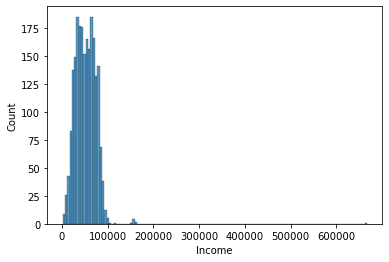

In [6]:
# Income feature has null values
# Let's plot income variable to get an idea of distribution
sns.histplot(df['Income'], kde=False)

<AxesSubplot:xlabel='Income'>

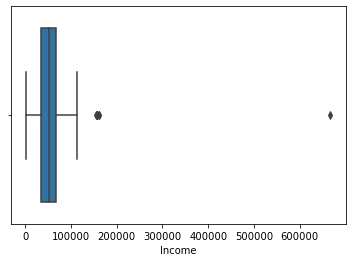

In [7]:
# Finding any outliers for income variable
sns.boxplot(df['Income'])

#### Findings about the income:

- Income contains 24 null values
- It is distributed between $ 0- $ 100,000 and has some outliers
- Fill null values with the median value to avoid the effect of outliers



In [8]:
df['Income']=df['Income'].fillna(df['Income'].median())

#### Outliers
Indentifying features that contain outliers by plotting them

In [9]:
df_to_plot=df.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 
                            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                            'Response', 'Complain']).select_dtypes(include=np.number)

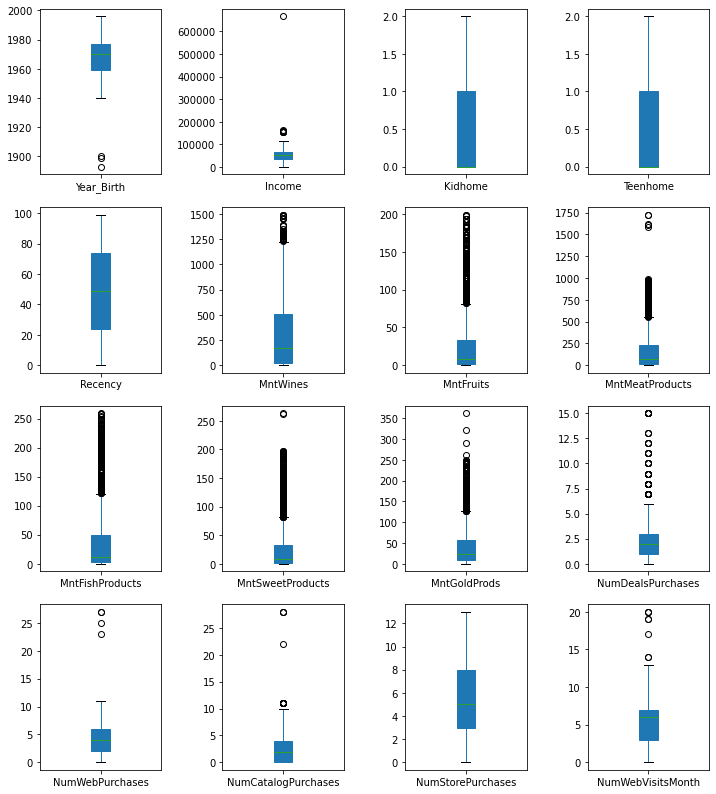

In [10]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

#### Findings about outliers:

- Multiple features contain outliers as show in the boxplots above but the only one that suggest wrong data-entry is Year_Birth<=1900.

- Removing rows where Year_Birth<=1900.


<AxesSubplot:>

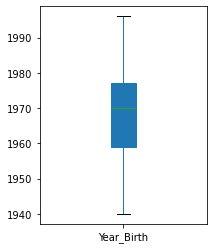

In [11]:
df = df[df['Year_Birth'] > 1900].reset_index(drop = True)

plt.figure(figsize = (3,4))
df['Year_Birth'].plot(kind = 'box', patch_artist = True)

### Are there any variables that need transformation?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

The variable Dt_Customer represents Date of customer's enrollment with the company so this should be in DateTime format.

In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Printing the Dt_Customer data type
df['Dt_Customer'].dtype

dtype('<M8[ns]')

#### Are there any useful variables that we can engineer with the given data?

- The total number of dependents ('Dependents') can be engineered with the sum of 'Kidhome' and 'Teenhome'
- Variable 'Year_Customer' which is year of becoming a customer can be engineered from 'Dt_Customer'
- The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'
- Similarly the total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
- The total number of campaigns accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [15]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

### Feature Engineering

In [16]:
# Total number of dependents
df['Dependents']=df['Kidhome']+df['Teenhome']

#year becoming a customer
df['Year_Customer']=pd.DatetimeIndex(df['Dt_Customer']).year

#total amount spend
mnt_cols= [col for col in df.columns if 'Mnt' in col]
df['TotalMnt']=df[mnt_cols].sum(axis=1)

#total purchases
purchases_cols=[col for col in df.columns if 'Purchase' in col]
df['TotalPurchases']=df[purchases_cols].sum(axis=1)

#total campaigns accepted
campaigns_cols=[col for col in df.columns if 'Cmp' in col]+['Response']
df['TotalCampaignsAcc']=df[campaigns_cols].sum(axis=1)

#view new features, by customer ID
df[['ID','Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


### Pattern in the data
- Identifying paterns by using feature correlation

In [115]:
#calculate correlation matrix
corr=df.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')
#sns.clustermap(corr, cmap="YlGnBu")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 19))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)
#cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap= cmap, vmin =-1, vmax=1, annot=True, fmt='.2f' ,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Saving the figure
my_path = SAVING_DIR
my_file = 'heatmap_correlation_matrix.png'
figure.savefig(os.path.join(my_path, my_file))
#figure.savefig('heatmap_correlation_matrix.png')
#plt.show()

KeyError: "['ID'] not found in axis"

From this heatmap we can observe the following clusters of correlated features:

- "High Income" cluster: Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively related with 'Income'. 
    - Purchasing in store, on the web, or via the catalog ('NumStorePurchases','NumWebPurchases','NumCatalogPurchases') is positively correlated with 'Income'
- "Dependents"cluster: Amount spent and number of purchases are negatively correlated with 'Dependents'. 
    - Purchasing deals ('NumDealsPurchases') is positively correlated with 'Dependents' and negatively correlated with 'Income'
- "Advertising Campaigns" cluster: Acceptence of advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other. 
    - Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster


### Let's Explore each of the cluster or variable in details

In [20]:
# Finding the correlation of Income vs rest of variables

df_corr = df.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Income']

,Feature 1,Feature 2,Correlation Coefficient
24,Income,Income,1.000000
58,Income,TotalMnt,0.664707
73,Income,NumCatalogPurchases,0.586750
77,Income,MntMeatProducts,0.577524
80,Income,MntWines,0.576731
85,Income,TotalPurchases,0.563999
100,Income,NumStorePurchases,0.527346
143,Income,MntFishProducts,0.437214
147,Income,MntSweetProducts,0.435918
151,Income,MntFruits,0.428191


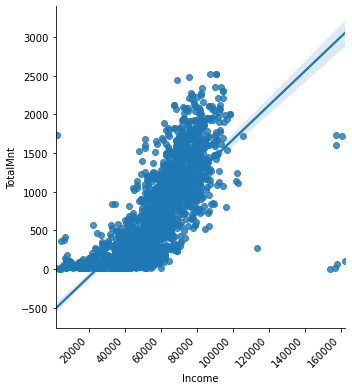

In [35]:
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income']<200000]) #  limiting income to < 200,000 to remove outliers
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='Education', ylabel='Income'>

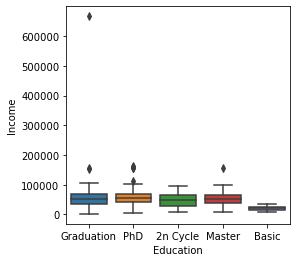

In [27]:
#### Plot illustrating the effect of education on spending
sns.boxplot(x='Education', y='Income', data=df)

<AxesSubplot:xlabel='Dependents', ylabel='TotalMnt'>

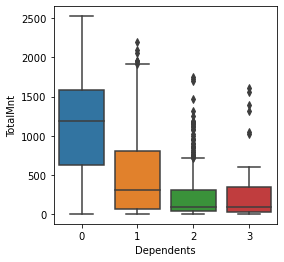

In [26]:
#### Plot illustrating the effect of having dependents (kids & teens) on spending
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df)

Observations of income variable:

Income is strongly positively correlated with:
total amount spent,
number of purchases,
amount spent for wines,
amount spent for meat,
total amount spent for luxury items,
number of catalog purchase,
number of store purchases,
and higher education (above basic)

On the other hand, income is negatively correlated with:
monthtly website visits and 
presence of minors in the household

Income is a key determinant of demand and their relationship is important to identify the trend such as direct or inverse relationship. In the case of luxury goods, income and demand are directly related. In case of inferior goods (e.g. basic food), income and demand are inversely related. This relationship has been described by Ernst Engel, a German statistician, in the 19th century. Engel’s Law states that households with lower income spend a larger proportion of their income on food compared to households with a higher income level. Nevertheless, the absolute dollar expenditures spent on food are still increasing for higher income households. The observations in this dataset that shows a trend towards purchases of luxury products for higher incomes are in line with these concepts.


#### Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased

<AxesSubplot:xlabel='Dependents', ylabel='NumDealsPurchases'>

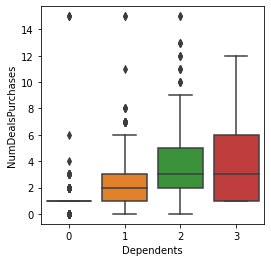

In [28]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df)

### Plots illustrating the positive effect of income and negative effect of having kids & teens on advertising campaign acceptance

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='Income'>

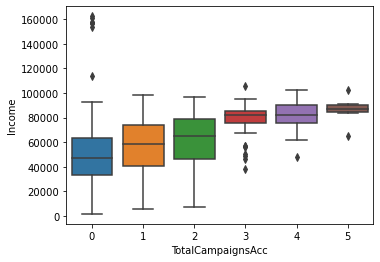

In [31]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000])

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='Dependents'>

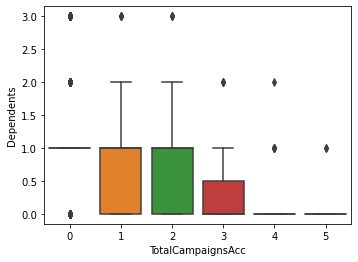

In [32]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=df)

### Explore effect of dependents

In [37]:
df_corr = df.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Dependents']

,Feature 1,Feature 2,Correlation Coefficient
3,Dependents,Dependents,1.000000
50,Dependents,Teenhome,0.698558
51,Dependents,Kidhome,0.690121
142,Dependents,NumDealsPurchases,0.439633
158,Dependents,NumWebVisitsMonth,0.417909
389,Dependents,Year_Customer,0.032178
394,Dependents,Complain,0.031477
424,Dependents,Recency,0.017796
493,Dependents,ID,-0.000989
580,Dependents,AcceptedCmp3,-0.020553


<AxesSubplot:xlabel='TotalPurchases', ylabel='Density'>

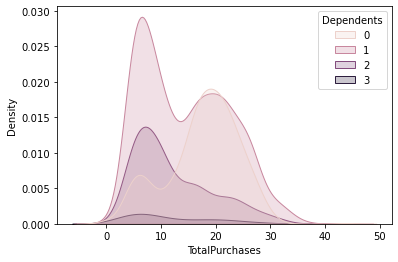

In [40]:
import seaborn as sns
sns.kdeplot(df['TotalPurchases'], data = df, hue = 'Dependents', fill=True)

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Density'>

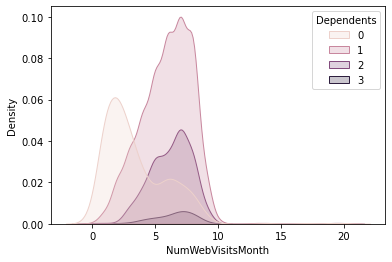

In [43]:
import seaborn as sns
sns.kdeplot(df['NumWebVisitsMonth'], data = df, hue = 'Dependents', fill=True)



Observations

The presence of minors in the household is positively correlated with:

    number of deals purchased
    number of monthly website visits

The presence of minors in the household is negatively correlated with:

    total amount spent
    amount spent on fish
    amount spent on meat
    amount spent on sweets
    amount spent on fruits
    amount spent on luxury items
    number of catalog purchases
    number of remote purchases
    number of store purchases
    Income

Presence of minor is negatively correlated with income and, in line with Engel's law, with the total amount spent. With more minors in the household, fewer purchases are done remotely, despite a higher number of website visits.


### Eplore effect of campaigns
#### Customer loyalty, recency, satisfaction and campaign responsiveness

In [44]:
df_corr = df.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'TotalCampaignsAcc']

,Feature 1,Feature 2,Correlation Coefficient
0,TotalCampaignsAcc,TotalCampaignsAcc,1.000000
44,TotalCampaignsAcc,Response,0.724757
53,TotalCampaignsAcc,AcceptedCmp5,0.676892
64,TotalCampaignsAcc,AcceptedCmp1,0.635202
96,TotalCampaignsAcc,AcceptedCmp4,0.539108
115,TotalCampaignsAcc,MntWines,0.488908
136,TotalCampaignsAcc,TotalMnt,0.455918
150,TotalCampaignsAcc,AcceptedCmp3,0.428899
160,TotalCampaignsAcc,AcceptedCmp2,0.417046
194,TotalCampaignsAcc,NumCatalogPurchases,0.351386




Obervations:

Responsiveness is positively correlated with:

    amount spent on wine
    amount spent on luxury items
    total amount spent
    number of catalog purchases
    numer of remote purchases
    amount spent on meat

Responsiveness is negativly correlated with:

    Income

We do not have any details on the type of marketing activities and what products/channels they promoted. The data suggest that the marketing activities had a stronger effect on purchases of luxury goods and remote purchases.


In [45]:
df_corr = df.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Recency']

,Feature 1,Feature 2,Correlation Coefficient
21,Recency,Recency,1.000000
398,Recency,NumCatalogPurchases,0.025449
399,Recency,MntMeatProducts,0.023705
401,Recency,MntSweetProducts,0.023045
409,Recency,TotalMnt,0.021199
417,Recency,AcceptedCmp4,0.018890
423,Recency,Dependents,0.017796
426,Recency,MntGoldProds,0.017412
428,Recency,Teenhome,0.017115
432,Recency,MntWines,0.016668


<AxesSubplot:xlabel='Year_Customer', ylabel='TotalMnt'>

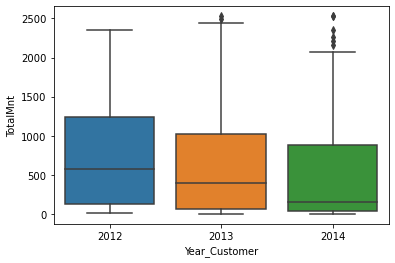

In [47]:
sns.boxplot(x='Year_Customer', y='TotalMnt', data=df)

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='Recency'>

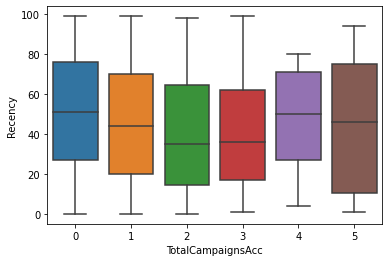

In [48]:
sns.boxplot(x='TotalCampaignsAcc', y='Recency', data=df)

<AxesSubplot:xlabel='Complain', ylabel='TotalMnt'>

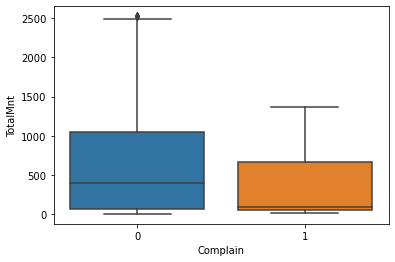

In [49]:
sns.boxplot(x='Complain', y='TotalMnt', data=df)

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='TotalPurchases'>

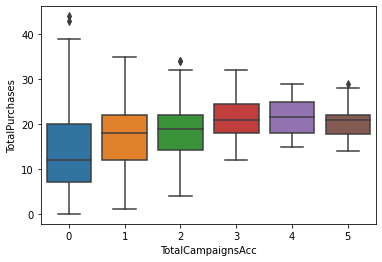

In [52]:
sns.boxplot(x='TotalCampaignsAcc', y='TotalPurchases', data=df)

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='TotalMnt'>

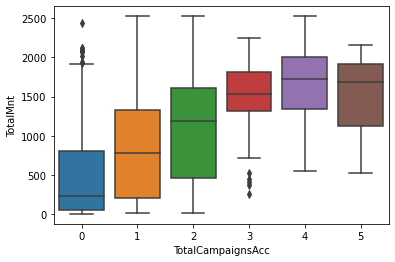

In [53]:
sns.boxplot(x='TotalCampaignsAcc', y='TotalMnt', data=df)



Observations:

    Total amount spent is negatively correlated with date of enrollment with the customer -> customer are loyal.
    Customers that responded to campaign 2 and 3 with the shortest time since last purchase
    Customer that responded to campaign 4(5) made the (2nd)highest number of purchases and spent the (2nd)most total amount
    Customer with a complaint spent less
    No strong correlations for feature "Recency"



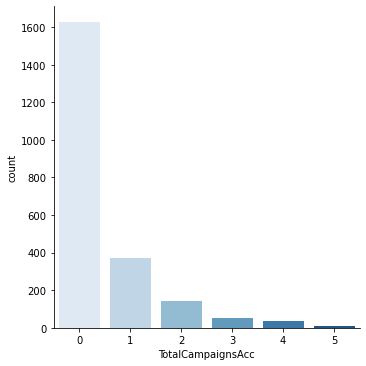

In [54]:
sns.catplot(x='TotalCampaignsAcc', kind='count', palette='Blues', data=df)

The majority of customers (more than 3/4) did not respond to any of the marketing campaigns.

In [55]:
df_corr = df.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'NumWebVisitsMonth']

,Feature 1,Feature 2,Correlation Coefficient
11,NumWebVisitsMonth,NumWebVisitsMonth,1.000000
139,NumWebVisitsMonth,Kidhome,0.447641
157,NumWebVisitsMonth,Dependents,0.417909
199,NumWebVisitsMonth,NumDealsPurchases,0.347261
323,NumWebVisitsMonth,Teenhome,0.134491
333,NumWebVisitsMonth,Year_Birth,0.117570
363,NumWebVisitsMonth,AcceptedCmp3,0.060955
412,NumWebVisitsMonth,Complain,0.020784
509,NumWebVisitsMonth,Response,-0.004449
518,NumWebVisitsMonth,AcceptedCmp2,-0.007330




Monthly website visits are positively correlated with:

    Number of deals purchases
    Presence of minors

Monthly website visits are negatively correlated with:

    Income
    Amount spent on meat
    Number of catalog purchases
    Number of store purchases
    Total amount spent
    Amount spent on fish
    Amount spent on sweets
    Amount spent on fruit
    Amount spent on luxury products
    Amount spent on wine


### Investigating anomaly in the data
- The number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
- Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggeting that deals are effective way of stiimulating purchase on the website


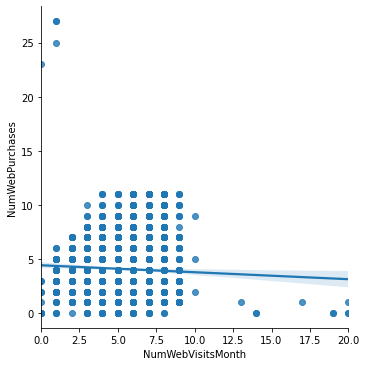

In [33]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df)

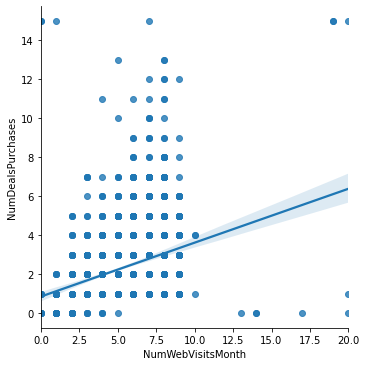

In [34]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df)

## Statistical Analysis

Run statistical tests in the form of regression to answer the questions and propose a data-driven action to the CMO. Interpret the result with non-statistical jargon so that CMO can understand the findings.
What factors are significantly related to the number of store purchases?

    We will use a Linear Regression model with NumStorePurchases as the target variables, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
    Begin by plotting the target variable:


<AxesSubplot:xlabel='NumStorePurchases', ylabel='count'>

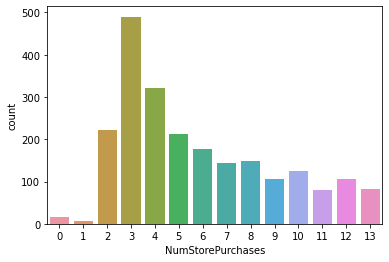

In [59]:
sns.countplot(df['NumStorePurchases'])

In [60]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc'],
      dtype='object')

Drop uninformative features:
- ID in unique to each customer
- Dt_Customer will be dropped in favour of using engineered variable Year_Customer
- Perform one-hot encoding of categorical features.



In [61]:
#drop unique ID
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [62]:
# checking the number of categorical features
cat=df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical features:\n", cat.nunique())

Number of unique values per categorical features:
 Education         5
Marital_Status    8
Country           8
dtype: int64


- We will apply a function to convert this categorical features into numerical features

In [67]:
df_reg = df.copy()

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df_reg = create_dummies(df_reg,"Education")
df_reg = create_dummies(df_reg,"Marital_Status")
df_reg = create_dummies(df_reg,"Country")

# After applying get_dummies method we don't need the original feature, so drop it
df_reg.drop(['Education', 'Marital_Status', 'Country'], axis=1, inplace = True)

df_reg.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,2014,1190,15,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2014,577,18,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,2014,251,11,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,2014,11,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2014,91,8,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [68]:
# checking the columns after converting categorical variables into numeric
df_reg.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Dependents', 'Year_Customer',
       'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_AUS',
       'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA',
       'Country_SP', 'Country_US'],
      dtype='object')

### Fitting the model

- Fit linear regression model on training data (70% of dataset)
- Evaluate predictions on test data (30% of dataset) using RMSE



In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=df_reg.drop(columns='NumStorePurchases')
y=df_reg['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model=LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Linear Regression Model RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable:", y.median())

Linear Regression Model RMSE: 3.4382007648487077e-13
Median value of target variable: 5.0


-The RMSE is exceedingly small compared to the median of the target variable, indicating good model predictions

### Let's interpret the results using Permutation importance:
- Significant feature are:'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'
- All other features are not significant

In [73]:
# pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm=PermutationImportance(model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names=X_test.columns.tolist(),top=5)

### Let's explore the directionality of these effects, using SHAP values

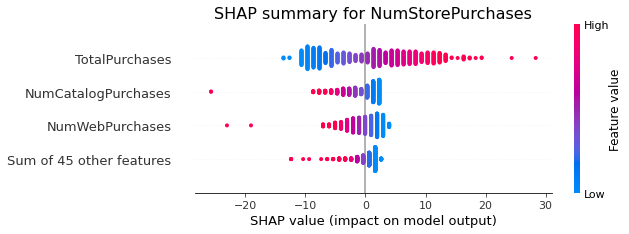

In [76]:
# pip install shap
import shap

#calculate shap values
ex=shap.Explainer(model, X_train)
shap_values=ex(X_test)

#plot
plt.title('SHAP summary for NumStorePurchases',size=16)
shap.plots.beeswarm(shap_values,max_display=4)

Findings:
- The number of store purchases increases with higher number of total purchases
- The number of store purchases decreases with higher number of catalog, web or deals purchases

Interpretation:
- Customers who shop the most in the stores are those who shop less via the catalog, website or special deals


### Let's explore the toal number of purchases by country
#### Does US fare significantly better than the Rest of the World in terms of total purchase?

Text(0, 0.5, 'Number of purchases')

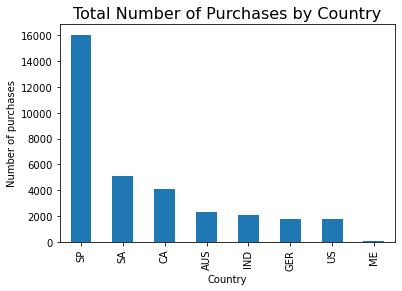

In [77]:
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of purchases')

Findings :
- Spain (SP) has the highest number of purchases
- US is second to last, therefore the US does not fare better than the Rest of the World in terms of total number of purchases


### Let's explore the total spent by country

Text(0, 0.5, 'Amount Spent')

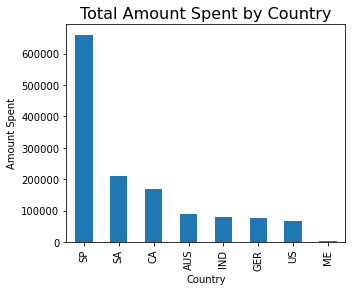

In [78]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent')

Findings:
- Spain (SP) has the highest total amount spent on purchases
- US is second to last, thus the US does not fare better than the rest of the world in terms of the total amount spent on purchases


#### Next Task: The supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test¶

#### Plot relationship between amount spent on gold in the last 2 years (MntGoldProds) and number of in store purchases (NumStorePurchases):

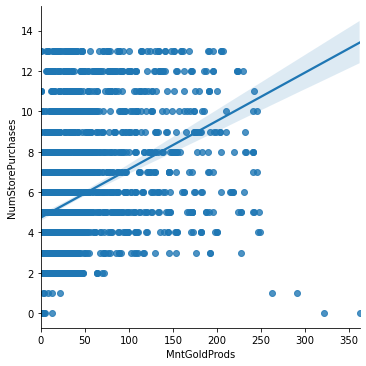

In [79]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data=df)

Findings: There is a positive relationship, but is it statistically significant?
- Perform Kendall Correlation Analysis (non parametric test since MntGoldProducts is not normally distributed and contains outliers)




In [80]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


- Findings: There is a significant positive correlation between the two variables.
- So, people who spent an above average amount on gold have indeed more in store purchases
- However, this does not prove causation that people who spent money on gold are more conservative and prefer buying in stores.

#### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

<AxesSubplot:xlabel='Education', ylabel='MntFishProducts'>

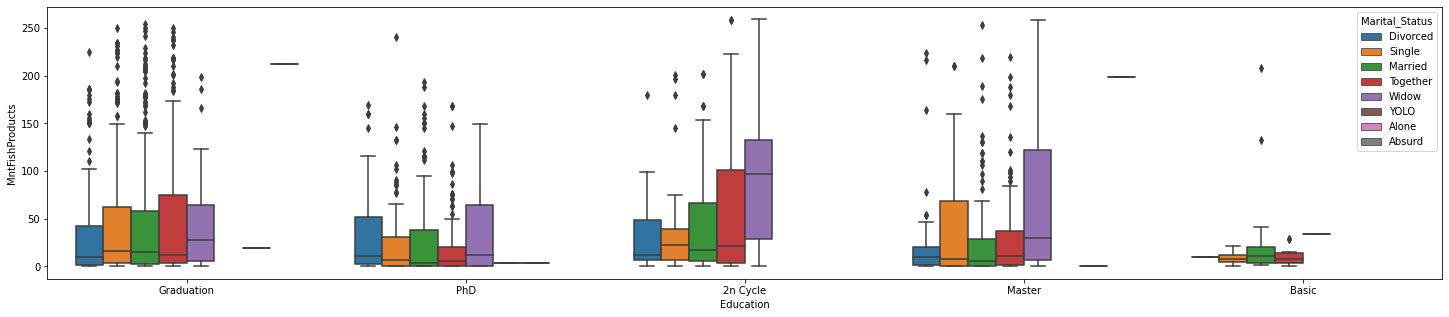

In [81]:
# Let's plot Marital satus vs amount of fish spent to get over all picture

plt.figure(figsize=(25,5))
sns.boxplot(x=df['Education'], y=df['MntFishProducts'], hue=df['Marital_Status'])

<AxesSubplot:xlabel='Married_PhD', ylabel='MntFishProducts'>

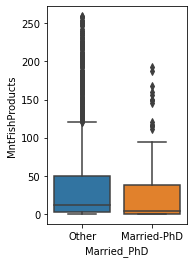

In [88]:
# Let's compare amount spent on Fish Products (MntFishProducts) between MarriedPhD candidates and all other customer:

#sum the marital status and phd dummy variables-the Married+PhD will have value of 2
df_reg['Married_PhD']=df_reg['Marital_Status_Married']+df_reg['Education_PhD']
df_reg['Married_PhD']=df_reg['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df_reg)

In [83]:
# Checking the significance using independent t-test p-value

from scipy.stats import ttest_ind
pval = ttest_ind(df_reg[df_reg['Married_PhD'] == 'Married-PhD']['MntFishProducts'], 
                 df_reg[df_reg['Married_PhD'] == 'Other']['MntFishProducts']).pvalue

print("t-test p-value: ", round(pval, 3))

t-test p-value:  0.005


Findings: 
- Married PhD candidates spend significantly less on fish products comapared to other customers.
- In other words, married PhD candidates do not spend more on fish products.


What other factors are significantly related to the amount spent on fish?

- Like the analysis of NumStorePurchases above, we will use Linear Regression model with MntFishProducts as the target variable, 
- and then use machine learning explainability techniques to get insights about which features predict the amount spent on fish.
- Begin by plotting the target variable: MntFishProducts



Text(0, 0.5, 'count')

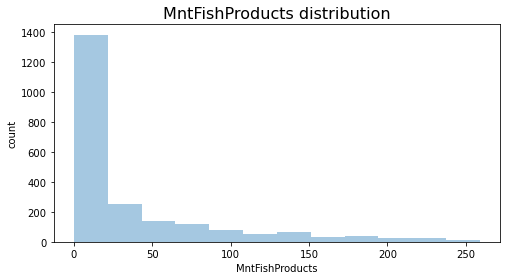

In [84]:
plt.figure(figsize=(8,4))
sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count')

- Fit linear regression to training data
- Evaluate predictions on the test data using RMSE

In [89]:
X=df_reg.drop(columns=['MntFishProducts', 'Married_PhD'])
y=df_reg['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model=LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  5.801061248430366e-13
Median value of target variable:  12.0


- The RMSE is excedingly small comapared to the median value of the target variable, indicating good model predictions

#### Identify features that significantly affect the amount spent on fish, using permutation importance:

In [91]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

- Significant features:'TotalMnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits'
- So, main factors related to the amount spent on fish are amounts spent on meat and wines.
- All other features are not significant

#### Explore the directionality of these effects, using SHAP values

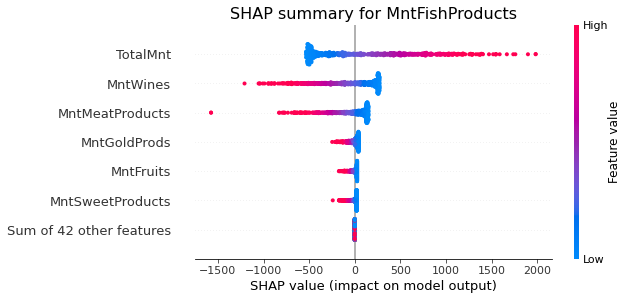

In [92]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7)

Findings:
- The amount spent on fish increases with higher total amount spent ('TotalMnt')
- The amount spent on fish decreases with higher amounts spent on wine, meat, gold, fruit, or sweets ('MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits')
Interpretation:
- Customers who spend the most on fish are those who spend less on other products (wine, meat, gold, fruit, and sweets)


## Campaign by Geographical location

Is there a significant relationship between geographical regional and success of a campaign?
- Plot success of campaigns by region using choropleth plot

In [110]:
# update plotly: pip install -U plotly 
# convert country codes to correct nomenclature for choropleth plot
# the dataset doesn't provide information about country codes
## so I'm taking my best guess about the largest nations that make sense given the codes provided
df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
df_cam = df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')

df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)',
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

Findings:
- The campaign acceptance rates are low overall
- The campaign with the highest overall acceptance rate is the most recent campaign (column name: Response)
- The country with the highest acceptance rate in any campaign is Mexico

## Data visualization

Let's plot and visualize to answers to the below questions.
- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?



Text(0.5, 1.0, 'Marketing campaign success rate')

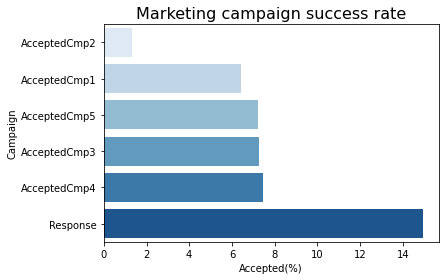

In [111]:
# Which marketing campaign is most successful?

cam_success=pd.DataFrame(df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].mean()*100, columns=['Percent']).reset_index()

#plot
sns.barplot(x="Percent", y='index', data=cam_success.sort_values('Percent'),palette='Blues')
plt.xlabel('Accepted(%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate',size=16)

Findings:
- The most successful campaign is the most recent ('Response')


In [116]:
#Convert Year_Birth to age
import datetime
now = datetime.datetime.now()
df['Age'] = now.year - df['Year_Birth']

In [122]:
# What does the average customer look like for the company?

#age
age = round(df['Age'].mean())
print("The avg age of the customer is: ", age)

#income
income = round(df['Income'].mean())
print("The avg income of customer is: ", income)

#customer since
customer_since = round(df['Year_Customer'].mean())
print("The avg year of becoming customer: ", customer_since)

#TotalAmountSpent
TotalAmountspent = round(df['TotalMnt'].mean())
print("The avg amount of total spent", TotalAmountspent)

#Responsiveness
Responsiveness = df['TotalCampaignsAcc'].mean()
print("The avg responsiveness to marketing campaign", Responsiveness)

#Number of Minors in Household
Minors = df['Dependents'].value_counts()
print("The number of minors/dependents in the household: ", Minors)

#Education
Education = df['Education'].value_counts()
print("The total count of education: ",Education)

#Marital_Status
Marital_Status = df['Marital_Status'].value_counts()
print("The total count of matrial status: ", Marital_Status)

#Recency
Recency = round(df['Recency'].mean())
print("The avg of recency: ",Recency)

The avg age of the customer is:  53
The avg income of customer is:  52227
The avg year of becoming customer:  2013
The avg amount of total spent 606
The avg responsiveness to marketing campaign 0.4470272686633885
The number of minors/dependents in the household:  1    1126
0     637
2     421
3      53
Name: Dependents, dtype: int64
The total count of education:  Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64
The total count of matrial status:  Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
The avg of recency:  49


The findings: The average customer
- is 52 years old
- is married
- has one minor in the household
- has graduated
- earns around 52k USD
- spent 606 USD in total
- responded to 0.4 marketing campaigns
- is a customer since 2013
- made the last purchase 49 days ago



In [123]:
# Which products are performing best by calculating the revenue of TotalAmountSpent for different products

TotalAmountspent_sum = round(df['TotalMnt'].sum())
print("Total Revenues" + " " + str(TotalAmountspent_sum))

Wines_sum = round(df['MntWines'].sum())
print("Wine Revenues" + " " + str(Wines_sum))

Fruits_sum = round(df['MntFruits'].sum())
print("Sweets Fruits" + " " + str(Fruits_sum))

Meat_sum = round(df['MntMeatProducts'].sum())
print("Meat Revenues" + " " + str(Meat_sum))

Fish_sum = round(df['MntFishProducts'].sum())
print("Fish Revenues" + " " + str(Fish_sum))

Sweet_sum = round(df['MntSweetProducts'].sum())
print("Sweets Revenues" + " " + str(Sweet_sum))

Gold_sum = round(df['MntGoldProds'].sum())
print("Gold Revenues" + " " + str(Gold_sum))

Total Revenues 1355048
Wine Revenues 680038
Sweets Fruits 58767
Meat Revenues 373393
Fish Revenues 83939
Sweets Revenues 60553
Gold Revenues 98358


Findings:
    
- Wines are the best performing products
- Meat products are the 2nd best performing
- Gold products are the 3rd best performing



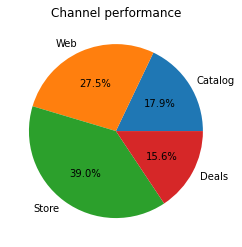

In [124]:
# Which channels are underperforming?

NumCatalogPurchases_sum = round(df['NumCatalogPurchases'].sum())

NumWebPurchases_sum = round(df['NumWebPurchases'].sum())

NumStorePurchases_sum = round(df['NumStorePurchases'].sum())

NumDealsPurchases_sum = round(df['NumDealsPurchases'].sum())

piechart_channel = np.array([NumCatalogPurchases_sum, NumWebPurchases_sum, NumStorePurchases_sum, NumDealsPurchases_sum])
mylabels = ["Catalog", "Web", "Store", "Deals"]

plt.pie(piechart_channel, labels = mylabels, autopct='%1.1f%%')
plt.title("Channel performance")
plt.show() 

Findings:
    
- Store is the most successful channel, followed by Web. 
- Catalog and Deals are the weakest channels, though we do not have any information whether the deals supported any of the other channels, e.g. special discount on web purchases.

### Summary of actionable findings to improve advertising campaign success:

- The most successful advertising campaign was the most recent campaign (column name: Response), and was particularly successful in Mexico (>60% acceptance rate!)
        Suggested action: Conduct future advertising campaigns using the same model recently implemented in Mexico.
        
- Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens
        Suggested action: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens
        
- The most successful products are wines and meats (i.e. the average customer spent the most on these items)
        Suggested action: Focus advertising campaigns on boosting sales of the less popular items

- The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels)
- The best performing channels are web and store purchases (i.e. the average customer made the most purchases via these channels)
        Suggested action: Focus advertising campaigns on the more successful channels, to reach more customers
